In [1]:
import seaborn as sns
%matplotlib inline

In [3]:
tips = sns.load_dataset('tips')

In [4]:
tips.head()

total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4

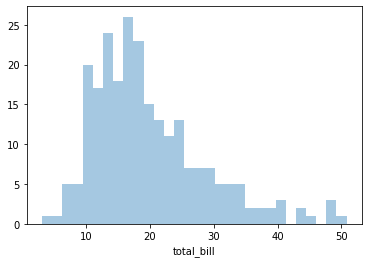

In [11]:
sns.distplot(tips['total_bill'],kde=False,bins=30)

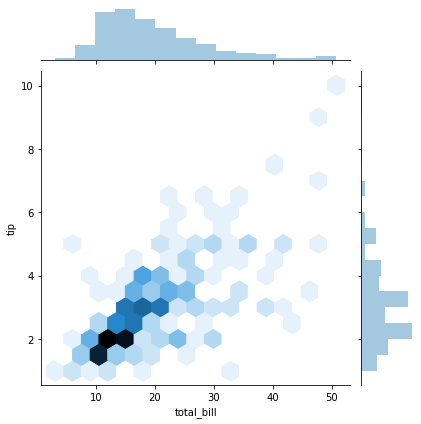

In [14]:
sns.jointplot(x='total_bill',y='tip',data=tips,kind='hex')

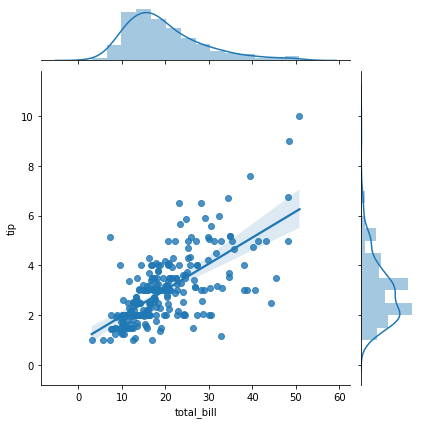

In [16]:
sns.jointplot(x='total_bill',y='tip',data=tips,kind='reg')

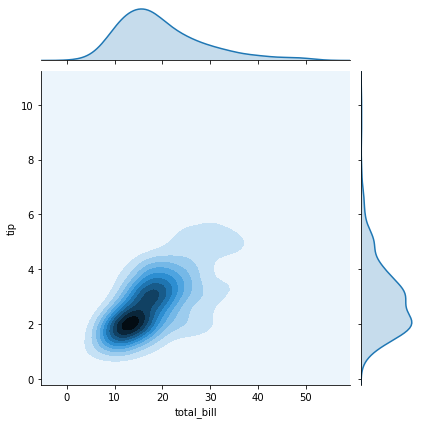

In [17]:
sns.jointplot(x='total_bill',y='tip',data=tips,kind='kde')

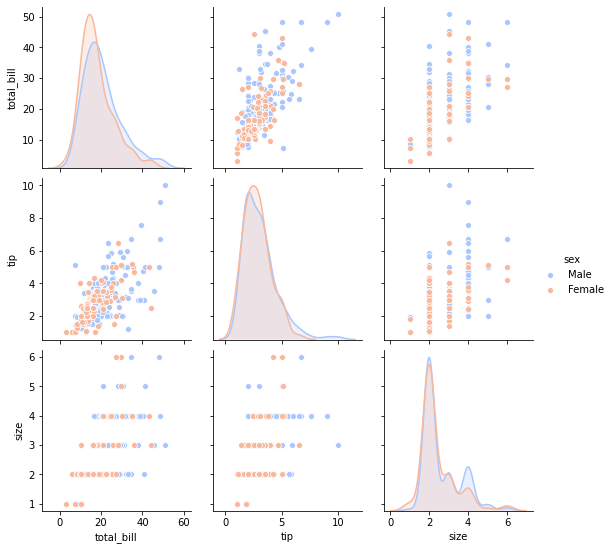

In [20]:
sns.pairplot(tips,hue='sex',palette='coolwarm')

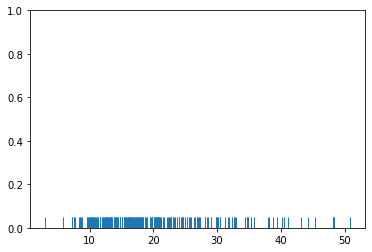

In [21]:
sns.rugplot(tips['total_bill'])

(0.0, 1.0)

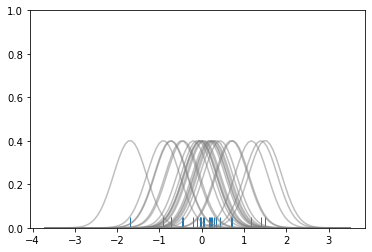

In [2]:
# Don't worry about understanding this code!
# It's just for the diagram below
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

#Create dataset
dataset = np.random.randn(25)

# Create another rugplot
sns.rugplot(dataset);

# Set up the x-axis for the plot
x_min = dataset.min() - 2
x_max = dataset.max() + 2

# 100 equally spaced points from x_min to x_max
x_axis = np.linspace(x_min,x_max,100)

# Set up the bandwidth, for info on this:
url = 'http://en.wikipedia.org/wiki/Kernel_density_estimation#Practical_estimation_of_the_bandwidth'

bandwidth = ((4*dataset.std()**5)/(3*len(dataset)))**.2


# Create an empty kernel list
kernel_list = []

# Plot each basis function
for data_point in dataset:
    
    # Create a kernel for each point and append to list
    kernel = stats.norm(data_point,bandwidth).pdf(x_axis)
    kernel_list.append(kernel)
    
    #Scale for plotting
    kernel = kernel / kernel.max()
    kernel = kernel * .4
    plt.plot(x_axis,kernel,color = 'grey',alpha=0.5)

plt.ylim(0,1)

Text(0.5, 0.98, 'Sum of the Basis Functions')

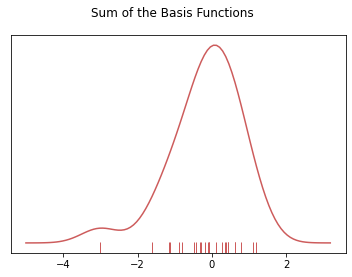

In [23]:
# To get the kde plot we can sum these basis functions.

# Plot the sum of the basis function
sum_of_kde = np.sum(kernel_list,axis=0)

# Plot figure
fig = plt.plot(x_axis,sum_of_kde,color='indianred')

# Add the initial rugplot
sns.rugplot(dataset,c = 'indianred')

# Get rid of y-tick marks
plt.yticks([])

# Set title
plt.suptitle("Sum of the Basis Functions")

In [4]:
import seaborn as sns
%matplotlib inline
tips = sns.load_dataset('tips')
tips.head()

total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4

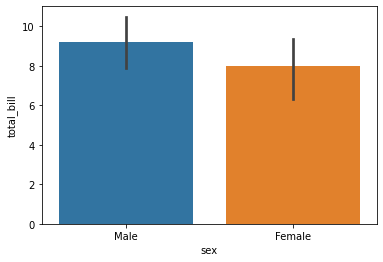

In [7]:
sns.barplot(x='sex',y='total_bill',data=tips,estimator=np.std)

In [8]:
import numpy as np

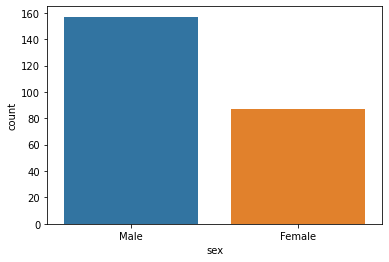

In [9]:
sns.countplot(x='sex',data=tips)

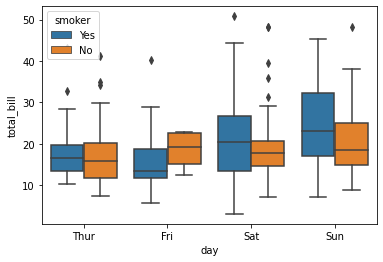

In [11]:
sns.boxplot(x='day',y='total_bill',data=tips,hue='smoker')

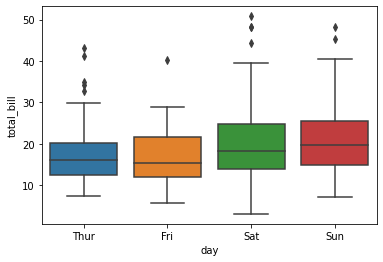

In [13]:
sns.boxplot(x='day',y='total_bill',data=tips)

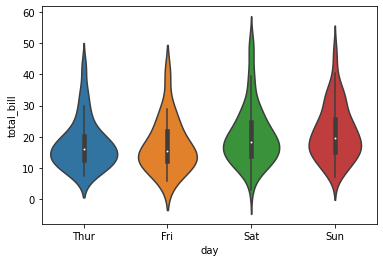

In [14]:
sns.violinplot(x='day',y='total_bill',data=tips)

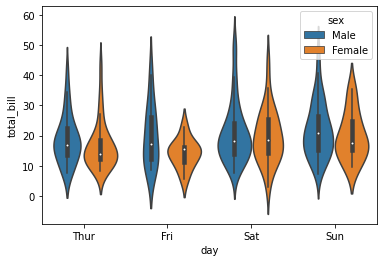

In [15]:
sns.violinplot(x='day',y='total_bill',data=tips,hue='sex')

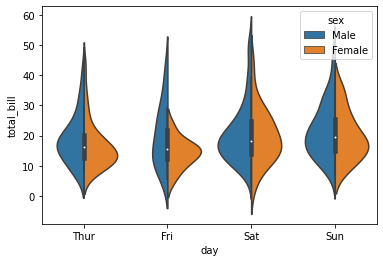

In [16]:
sns.violinplot(x='day',y='total_bill',data=tips,hue='sex',split=True)

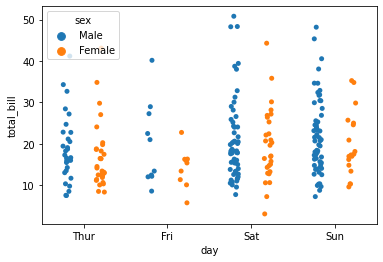

In [22]:
sns.stripplot(x='day',y='total_bill',data=tips, jitter=True,hue='sex',dodge=True)

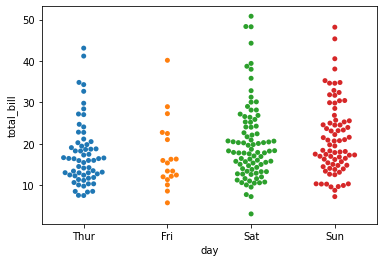

In [23]:
sns.swarmplot(x='day',y='total_bill',data=tips)

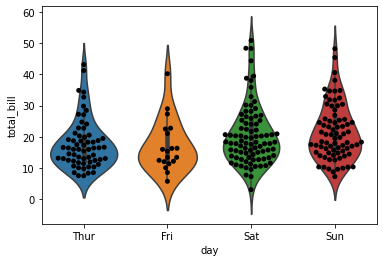

In [24]:
sns.violinplot(x='day',y='total_bill',data=tips)
sns.swarmplot(x='day',y='total_bill',data=tips,color='black')

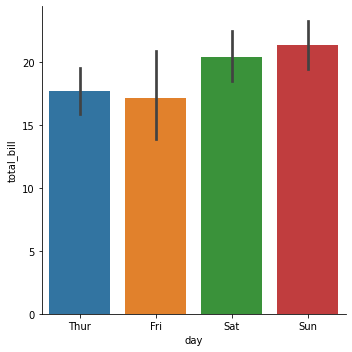

In [26]:
sns.catplot(x='day',y='total_bill',data=tips,kind='bar')

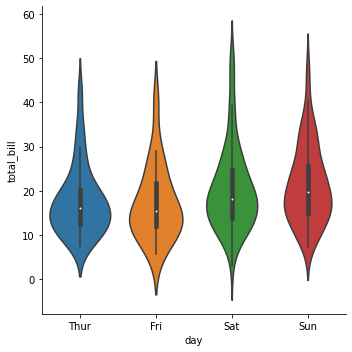

In [27]:
sns.catplot(x='day',y='total_bill',data=tips,kind='violin')

In [28]:
# Matrix Plots

In [29]:
import seaborn as sns
%matplotlib inline
tips = sns.load_dataset('tips')
flights = sns.load_dataset('flights')
tips.head()

total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4

In [30]:
flights.head()

year     month  passengers
0  1949   January         112
1  1949  February         118
2  1949     March         132
3  1949     April         129
4  1949       May         121

In [32]:
tc=tips.corr()

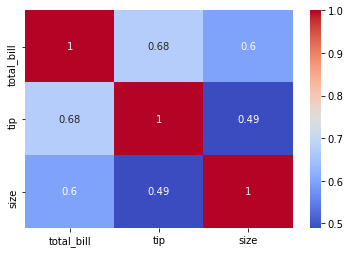

In [36]:
sns.heatmap(tc,annot=True,cmap='coolwarm')

In [34]:
tc

total_bill       tip      size
total_bill    1.000000  0.675734  0.598315
tip           0.675734  1.000000  0.489299
size          0.598315  0.489299  1.000000

In [37]:
flights

year      month  passengers
0    1949    January         112
1    1949   February         118
2    1949      March         132
3    1949      April         129
4    1949        May         121
..    ...        ...         ...
139  1960     August         606
140  1960  September         508
141  1960    October         461
142  1960   November         390
143  1960   December         432

[144 rows x 3 columns]

In [39]:
fp = flights.pivot_table(index='month',columns='year',values='passengers')

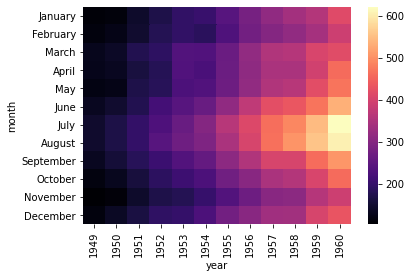

In [41]:
sns.heatmap(fp,cmap='magma')

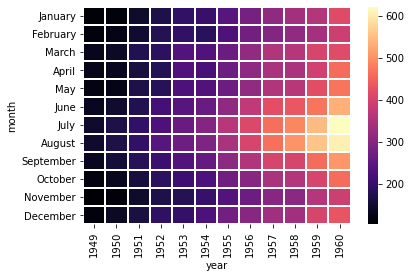

In [42]:
sns.heatmap(fp,cmap='magma',linecolor='white',linewidths=1)

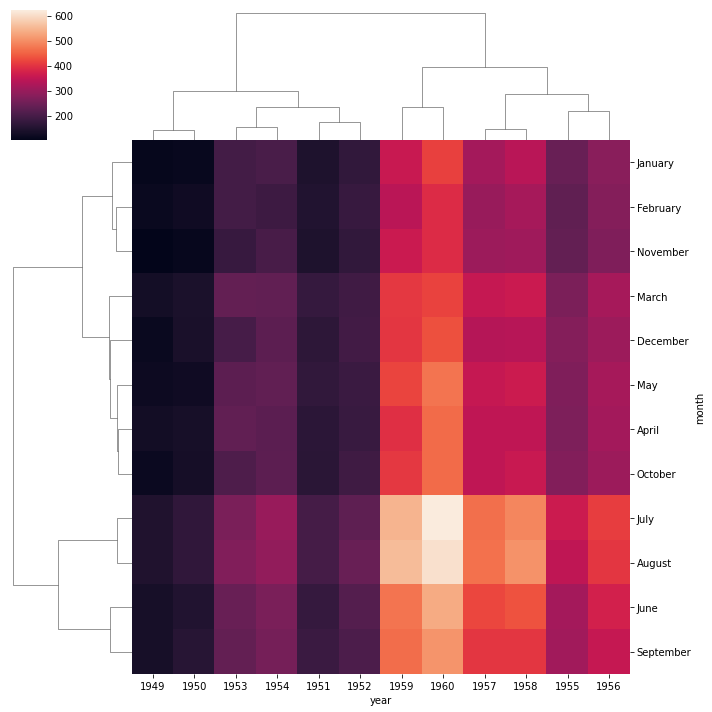

In [43]:
sns.clustermap(fp)

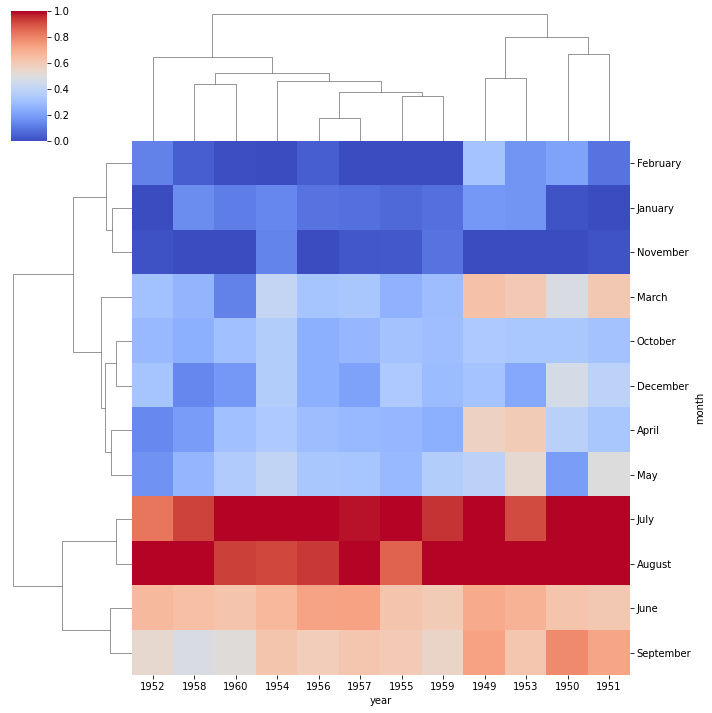

In [45]:
sns.clustermap(fp,cmap='coolwarm',standard_scale=1)